In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [26]:
all_words = []
string_of_vid = {}
words_in_vid = {}
lines_in_vid = {}
for filename in [i for i in os.listdir('txt/') if '.txt' in i]:
    f = open('./txt/'+filename,'r')
    content = f.read()
    lines_in_vid[filename] = content.split('\n')
    content = content.replace('\n',' ')
    string_of_vid[filename] = content
    words = content.split(' ')
    words = [w for w in words if w!='']
    words_in_vid[filename] = content
    for word in words:
        all_words.append(word)
    f.close()

In [7]:
# method that returns the files and lines where a word is
def search_word(word='Montreal'):
    """
    input
        word (str)
    output
        tuple (filename, line, index of line in txt file)
    """
    occurences = []
    for filename in lines_in_vid:
        for line in lines_in_vid[filename]:
#             print(line)
            if word in line:
                occurences.append((filename,line,lines_in_vid[filename].index(line)))
    print(len(occurences),'occurences found in total\n')
    return occurences

In [8]:
# method tha takes word and filename and displays the lines surrounding the word
def display_neighbourhood(filename,index,epsilon=3):
    lines = lines_in_vid[filename]
    print('{} line {}\n'.format(filename,index))
    for idx in range(max(0,index-epsilon),min(len(lines),index+epsilon+1)):
        print(lines[idx])
    
def display_neighbourhood_of_word(word='Montreal',epsilon=3):
    occurences = search_word(word)
    for i in occurences:
        print()
        display_neighbourhood(filename=i[0],index=i[2],epsilon=epsilon)
        
def store_neighbourhood_of_word(word='Montreal',epsilon=3):
    occurences = search_word(word)
    f = open('occurence_of_{}_epsilon={}.txt'.format(word,epsilon),'w')
    for i in occurences:
        filename = i[0]
        index = i[2]
        lines = lines_in_vid[filename]
        f.write('{} line {}\n'.format(filename,index))
        for idx in range(max(0,index-epsilon),min(len(lines),index+epsilon+1)):
            f.write(lines[idx]+'\n')
        f.write('\n')
    f.close()

In [9]:
# display_neighbourhood_of_word('Montreal')
store_neighbourhood_of_word('Montreal')

13 occurences found in total



In [10]:
o = search_word('Montreal')

13 occurences found in total



In [27]:
all_words

['okay',
 'I',
 'think',
 'I',
 'just',
 'found',
 'something',
 'amazing',
 'follow',
 'the',
 'way',
 'to',
 'make',
 'candies',
 'and',
 "it's",
 'just',
 'something',
 'special',
 'and',
 "I'm",
 'going',
 'to',
 'show',
 'you',
 'how',
 'to',
 'do',
 'it',
 'but',
 'it',
 'takes',
 'a',
 'little',
 'while',
 'first',
 'thing',
 'is',
 "we're",
 'going',
 'to',
 'eat',
 'ice',
 'but',
 'not',
 'this',
 'this',
 'is',
 'no',
 'good',
 'so',
 'we',
 'pick',
 'this',
 'out',
 'the',
 'water',
 'just',
 'like',
 'a',
 'little',
 'bit',
 'okay',
 'now',
 'we',
 'have',
 'the',
 'bottom',
 'thingy',
 'there',
 'wait',
 'you',
 'may',
 'be',
 'okay',
 'has',
 'to',
 'be',
 'about',
 'equal',
 'amount',
 'of',
 'water',
 'in',
 'each',
 'holder',
 'but',
 'it',
 'has',
 'to',
 'be',
 'just',
 'a',
 'little',
 'bit',
 'just',
 'like',
 'okay',
 'Bibi',
 'is',
 'a',
 'little',
 'bit',
 'more',
 'okay',
 'I',
 'think',
 "that's",
 'okay',
 "that's",
 'pretty',
 'much',
 'it',
 'so',
 "we're",

In [30]:
sorted_words = all_words
sorted_words.sort()

In [65]:
freq = Counter(sorted_words)
# print(freq)
# put into array format
freq_arr = []
for key in freq:
    freq_arr.append([freq[key],key])
freq_arr.sort(reverse=True)
Y,X = np.array(freq_arr).T
Y = [int(i) for i in Y]

Text(0.5, 1.0, 'Words He Uses')

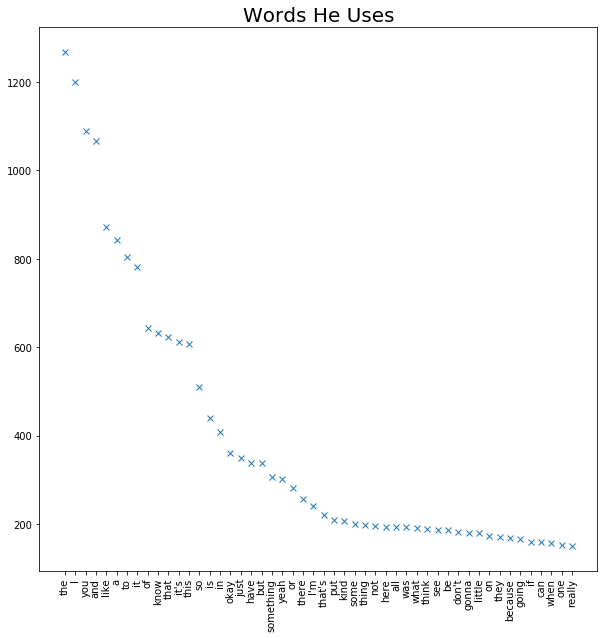

In [33]:
n=50
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.plot(np.arange(len(Y[:n])),Y[:n],'x')
plt.xticks(ticks=np.arange(len(X[:n])),
                   labels=X[:n],rotation=90)
plt.title('Words He Uses',fontsize=20)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

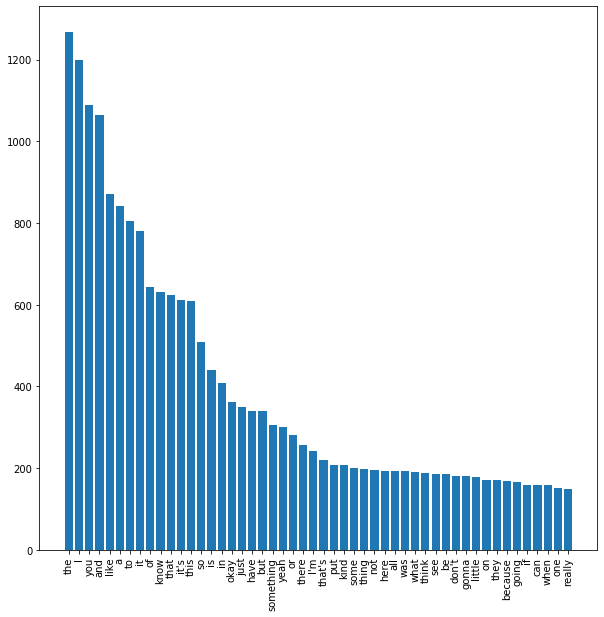

In [39]:
plt.figure(figsize=(10,10))
plt.bar(X[:n],Y[:n])
plt.xticks(rotation=90)

In [79]:
# load the most common words in english language into a pd df
df = pd.read_csv('english-word-list-total.csv',delimiter=';',skiprows=3)

In [80]:
df.head()

,Unnamed: 0,word,frequence,Unnamed: 3
0,1.0,the,1 086 322 084,1
1,2.0,and,570 238 088,"0,524925431"
2,3.0,to,567 125 659,"0,522060324"
3,4.0,of,520 616 100,"0,47924654"
4,5.0,a,450 818 768,"0,414995492"


In [81]:
# take away the 500 most common words in the english language to get his idiosyncracy
maso_words = []
common_words = df['word'].values
for word in all_words:
    if word not in common_words and "'" not in word and '[' not in word:
        maso_words.append(word)

In [83]:
sorted_maso_words = maso_words[:]
sorted_maso_words.sort()

freqm = Counter(sorted_maso_words)

# put into array format
freqm_arr = []
for key in freqm:
    freqm_arr.append([freqm[key],key])
freqm_arr.sort(reverse=True)
Y,X = np.array(freqm_arr).T
Y = [int(i) for i in Y]

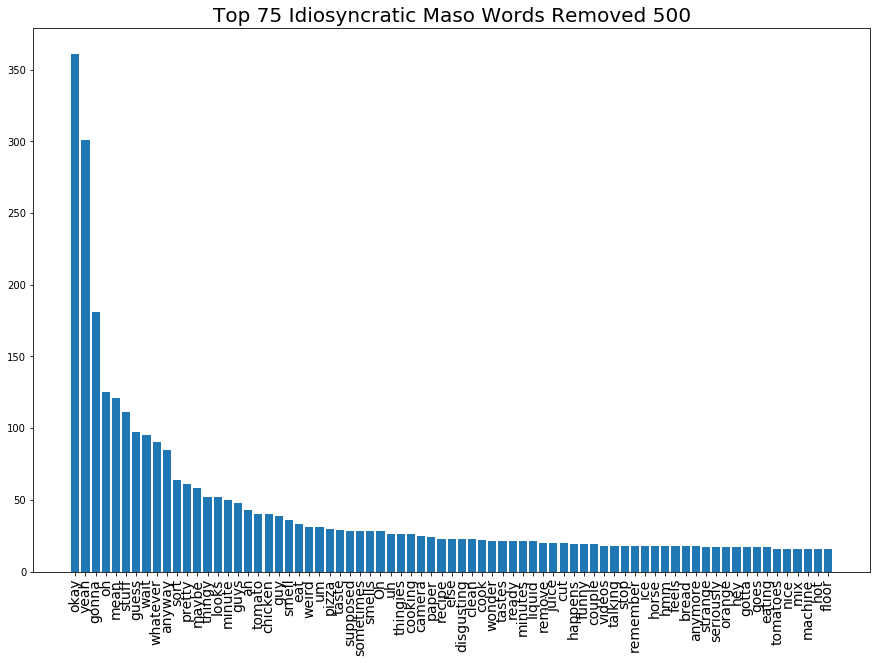

In [101]:
n=75
plt.figure(figsize=(n/5,10))
plt.title('Top {} Idiosyncratic Maso Words Removed 500'.format(n),fontsize=20)
plt.bar(X[:n],Y[:n])
plt.xticks(rotation=90,fontsize=14)
plt.savefig('top {} idiosyncratic maso vocabulary 500.png'.format(n))

In [ ]:
numpy